In [87]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import pylab as pl
from sklearn.linear_model import BayesianRidge

In [88]:
def get_len(row):
    from collections import Counter
    return Counter(list(row))['C']

In [89]:
df = pd.read_csv('./data/components-blends-knight.csv',sep='\t',index_col=0)
df["slen"]=df.source.apply(len)
df["tlen"]=df.target.apply(get_len)
df["ratio"]=df["slen"]/df["tlen"]

In [90]:
m = BayesianRidge(verbose=True, compute_score=True)

In [91]:
X=df["slen"].values.reshape(-1,1)
y=df["tlen"].values
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y)

In [92]:
m.fit(X_train, y_train)

Convergence after  2  iterations


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=True, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=True)

In [93]:
from sklearn.metrics import r2_score
r2_score(y_test,m.predict(X_test))

0.562570846424661

In [94]:
m.predict([[16]], return_std=True)[1][0]

1.7747074064529744

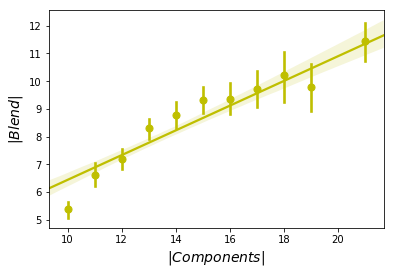

In [95]:
sns.regplot(df.slen.values, df.tlen.values, color='y', x_bins=20)
pl.xlabel('$|Components|$', fontsize=14)
pl.ylabel('$|Blend|$', fontsize=14)
pl.savefig('./figs/components_blend_regplot.pdf', bbox_inches='tight')